### MLP for regression

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

  a) Load the mpg dataset using seaborn. (*)

  b) Use your data analysis skills to perform EDA. (*)

  c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

  d) Can you figure out a way to see if the values filled in are reasonable? (**)

  e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

  f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

  g) Now use early stopping to tune the number of epochs. (*)

  h) Train on all training data and validation data. (*)

  i) Predict on test data and evaluate. (*)

  j) Can you create an MLP model that beats random forest for this dataset? (**)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
# a)

# Load the data
df = sns.load_dataset('mpg')

In [4]:
# b) EDA

# Print the first 5 rows
print(df.head())

# Print the last 5 rows
print(df.tail())

# Print the shape of the data
print(df.shape)

# Print the column names
print(df.columns)

# Print the data types of the columns
print(df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295         

In [5]:
df["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
# c) Find out the missing values in the dataset and use machine learning to fill them in (imputation)

# Check for missing values
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [14]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['origin'])

# Prepare data 
df_not_null = df_encoded[df_encoded['horsepower'].notnull()]
df_null = df_encoded[df_encoded['horsepower'].isnull()]

# Features and target for training
X = df_not_null.drop(columns=['horsepower', 'name']) # drop target & irrelevant column
y = df_not_null['horsepower']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the missing values
X_null = df_null.drop(columns=['horsepower', 'name'])
predicted_values = model.predict(X_null)

# Fill in the missing values
df.loc[df['horsepower'].isnull(), 'horsepower'] = predicted_values

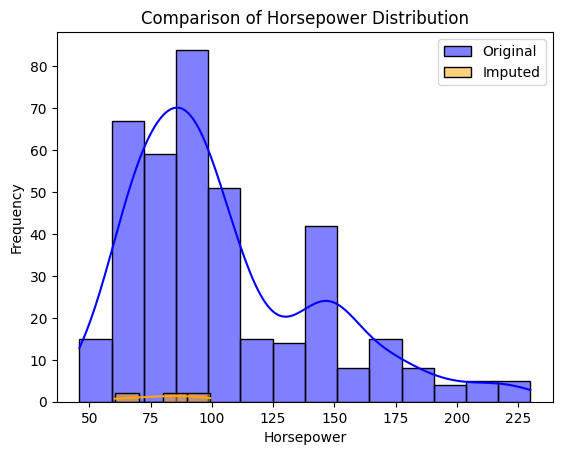

In [15]:
# Plot results

# Original data
sns.histplot(df_not_null['horsepower'], color='blue', label='Original', kde=True)

# Distribution of predicted values
sns.histplot(predicted_values, color='orange', label='Imputed', kde=True)

plt.title('Comparison of Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [16]:
# Check descriptive statistics

# Statistics of original values
print("Original Horsepower stats: ")
print(df_not_null['horsepower'].describe())

# Statistics of imputed values
print("\nImputed Horsepower stats: ")
print(pd.Series(predicted_values).describe())

Original Horsepower stats: 
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

Imputed Horsepower stats: 
count     6.000000
mean     81.050000
std      14.015484
min      60.540000
25%      72.687500
50%      83.030000
75%      89.045000
max      99.410000
dtype: float64


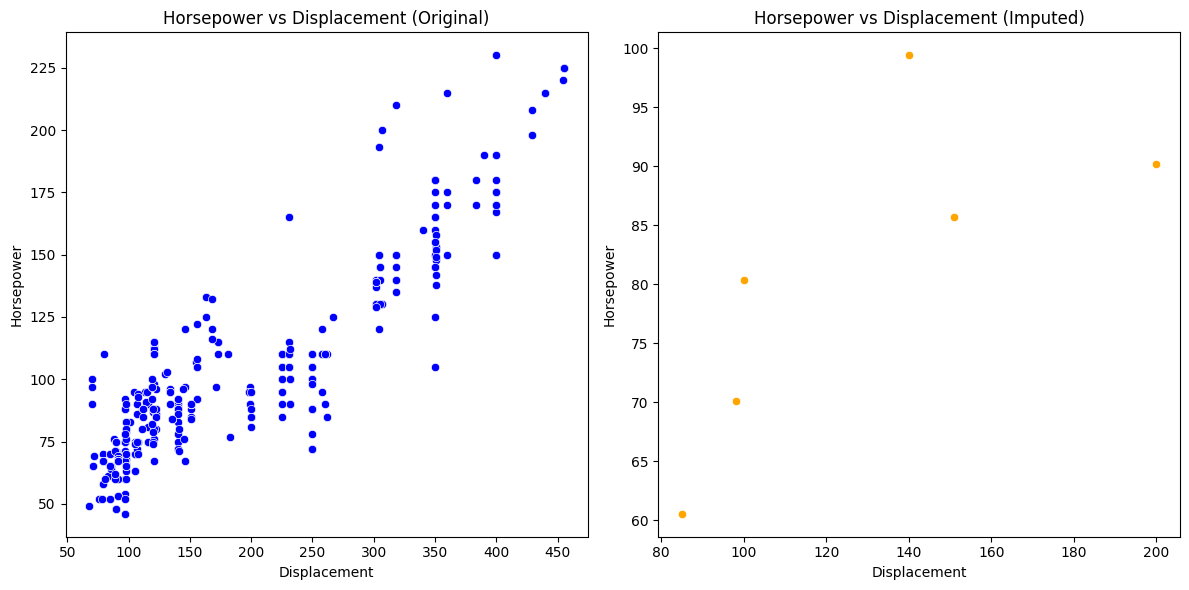

In [17]:
# d) 

# Scatterplot before and after imputation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before imputation
sns.scatterplot(data=df_not_null, x='displacement', y='horsepower', ax=ax[0], color='blue')
ax[0].set_title('Horsepower vs Displacement (Original)')
ax[0].set_xlabel('Displacement')
ax[0].set_ylabel('Horsepower')

# After imputation
imputed_data = df_null.copy()
imputed_data['horsepower'] = predicted_values
sns.scatterplot(data=imputed_data, x='displacement', y='horsepower', ax=ax[1], color='orange')
ax[1].set_title('Horsepower vs Displacement (Imputed)')
ax[1].set_xlabel('Displacement')
ax[1].set_ylabel('Horsepower')

plt.tight_layout()
plt.show()

In [ ]:
# e)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error

# Split the dataset

# Drop irrelevant columns
features = df.drop(columns=['horsepower', 'name'])
target = df['horsepower']

# Train-validation-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)